In [1]:
import skimage.io as io
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
tfrecords_filename = '../data/indian_celebrities_male.tfrecords'

reconstructed_images = []

record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)

for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    height = int(example.features.feature['height'].int64_list.value[0])
    width = int(example.features.feature['width'].int64_list.value[0])
    img_string = (example.features.feature['image_raw'].bytes_list.value[0])
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_image = img_1d.reshape((height, width, -1))
    
    reconstructed_images.append(reconstructed_image)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:13: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


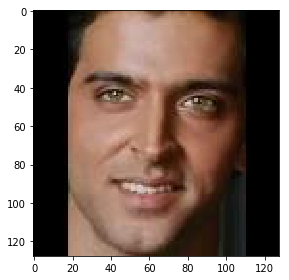

In [3]:
io.imshow(reconstructed_images[1])